In [163]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/dodkins/PythonProjects/stocks/options_testing/options_testing')

import os
from datetime import datetime 
import pandas as pd
import opstrat as op

from robinhood import get_options_plays
from yahoo import get_tsla 
from plots import plot_candles, plot_line, plot
from options import get_option_history, weekly_short_calls, LEAPS
from utils import aggregate
from quantconnect import load_tsla_hourly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
tsla = load_tsla_hourly()

datetime 21450
open 21450
high 21450
low 21450
close 21450
volume 21450


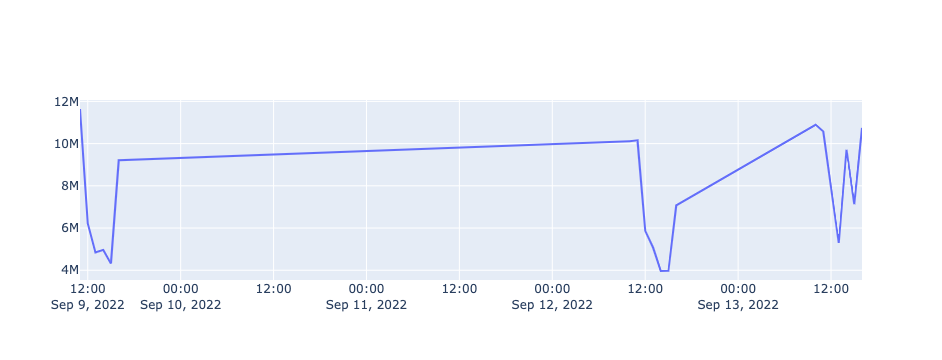

In [51]:
plot_line(tsla[-20:], value='volume')

In [83]:
tsla.index[13220]

' 2018-01-08 13:00:00'

In [86]:
tsla.loc[' 2018-01-02 10:00:00']

open      2.082000e+01
high      2.118000e+01
low       2.073400e+01
close     2.116800e+01
volume    1.273140e+07
Name:  2018-01-02 10:00:00, dtype: float64

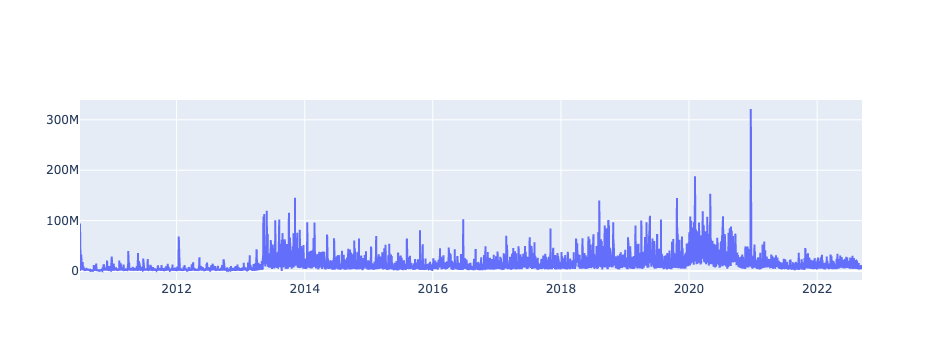

In [92]:
plot_line(tsla, value='volume', log_y=False)

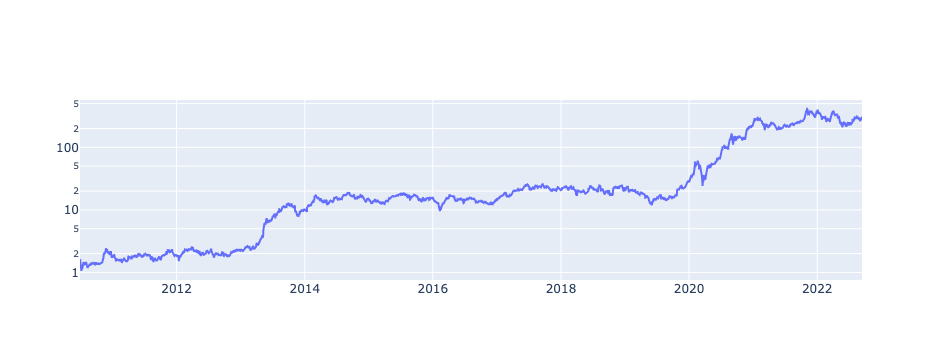

In [98]:
plot_line(tsla, value='close', log_y=True)

In [99]:
tsla_weekly = aggregate(tsla, freq='weekly')

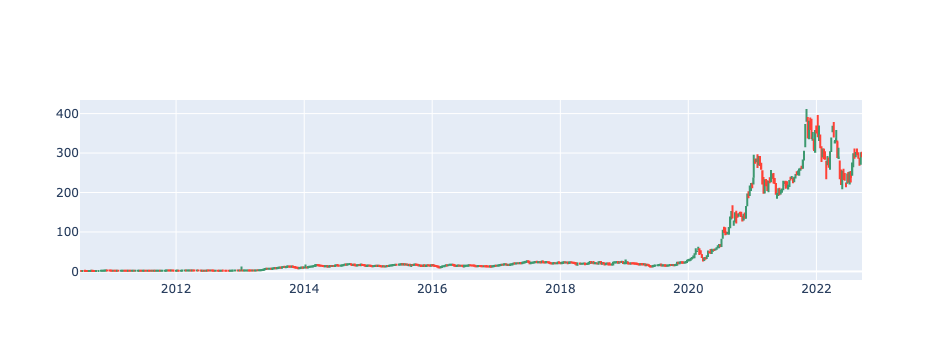

In [100]:
plot_candles(tsla_weekly, show_afterhours=True)

In [101]:
short_call = weekly_short_calls(tsla)

In [103]:
short_call

underlying open  underlying high  underlying low  underlying close  \
0           1.266667         1.730666        1.266667          1.280000   
1           1.333333         1.333333        1.076000          1.160000   
2           1.196667         1.380000        1.170000          1.380000   
3           1.423333         1.456667        1.366667          1.419333   
4           1.433333         1.433333        1.346667          1.329333   
..               ...              ...             ...               ...   
633       301.773303       311.666635      299.236637        296.666637   
634       292.136637       302.300000      291.519971        288.090000   
635       283.000000       288.000000      272.590000        270.210000   
636       272.630000       291.600000      272.630000        299.680000   
637       300.590000       300.590000      292.900000        292.130000   

         strike  call open  call close  weekly profit                date  \
0      1.330000   0.010021      0.0000       0.010021 2010-07-02 09:30:00   
1      1.400000   0.010548      0.0000       0.010548 2010-07-09 09:30:00   
2      1.256500   0.009467      0.1235      -0.114033 2010-07-16 09:30:00   
3      1.494500   0.011260      0.0000       0.011260 2010-07-23 09:30:00   
4      1.505000   0.011339      0.0000       0.011339 2010-07-30 09:30:00   
..          ...        ...         ...            ...                 ...   
633  316.861968   2.387401      0.0000       2.387401 2022-08-20 09:30:00   
634  306.743469   2.311163      0.0000       2.311163 2022-08-27 09:30:00   
635  297.150000   2.238881      0.0000       2.238881 2022-09-03 09:30:00   
636  286.261500   2.156842     13.4185     -11.261658 2022-09-10 09:30:00   
637  315.619500   2.378040      0.0000       2.378040 2022-09-17 09:30:00   

     running profit  
0          0.010021  
1          0.020569  
2         -0.093464  
3         -0.082203  
4         -0.070864  
..              ...  
633     -276.951290  
634     -274.640127  
635     -272.401246  
636     -283.662904  
637     -281.284864  

[638 rows x 10 columns]

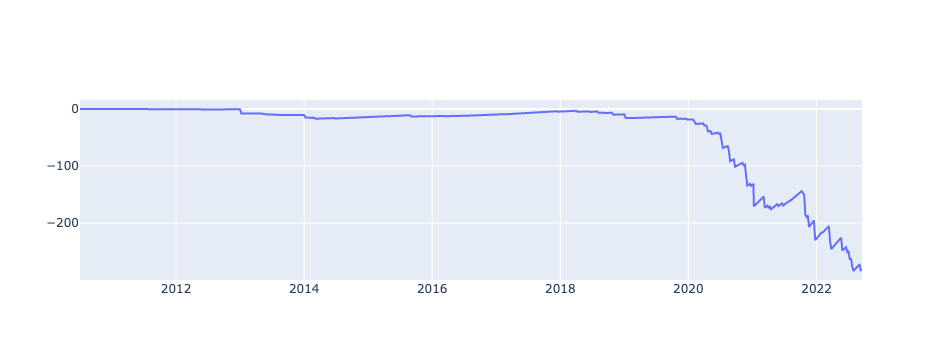

In [104]:
plot_line(short_call, value='running profit', show_afterhours=True)

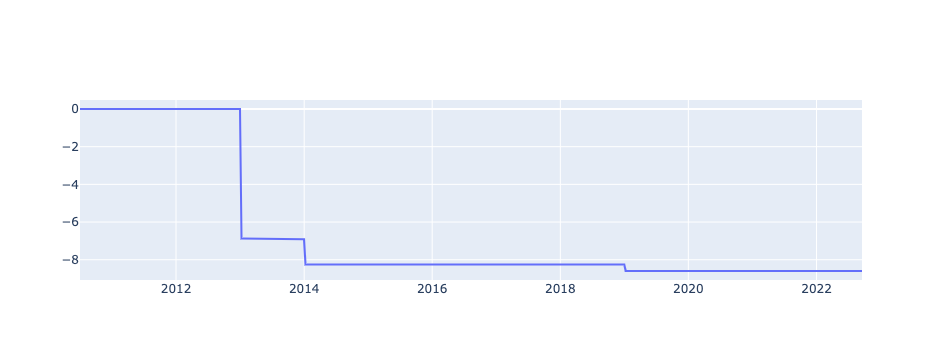

In [112]:
short_call = weekly_short_calls(tsla, 35)
plot_line(short_call, value='running profit', show_afterhours=True)

In [113]:
leap_hourly = get_option_history(tsla_weekly, strike=20, expiration='9/30/2022', risk_free=3)

In [114]:
leap_hourly

option value intrinsic value time value     delta  \
2010-07-02 09:30:00     0.274851               0   0.274851  0.360905   
2010-07-09 09:30:00     0.231995               0   0.231995  0.340468   
2010-07-16 09:30:00     0.309954               0   0.309954  0.374668   
2010-07-23 09:30:00     0.323895               0   0.323895  0.379669   
2010-07-30 09:30:00     0.289481               0   0.289481  0.365505   
...                          ...             ...        ...       ...   
2022-08-20 09:30:00   276.732282      276.666637   0.065645       1.0   
2022-08-27 09:30:00   268.144173          268.09   0.054173       1.0   
2022-09-03 09:30:00   250.252694          250.21   0.042694       1.0   
2022-09-10 09:30:00   279.711209          279.68   0.031209       1.0   
2022-09-17 09:30:00   272.149716          272.13   0.019716       1.0   

                        gamma     theta      vega       rho   DTE  
2010-07-02 09:30:00  0.157686 -0.000115  0.016776  0.022925  4472  
2010-07-09 09:30:00   0.17049 -0.000102  0.014874  0.019933  4465  
2010-07-16 09:30:00  0.148307 -0.000126  0.018283  0.025293  4458  
2010-07-23 09:30:00  0.144907  -0.00013  0.018867  0.026216  4451  
2010-07-30 09:30:00  0.152966  -0.00012  0.017443  0.023912  4444  
...                       ...       ...       ...       ...   ...  
2022-08-20 09:30:00       0.0 -0.001638       0.0  0.021846    40  
2022-08-27 09:30:00       0.0 -0.001639       0.0  0.018033    33  
2022-09-03 09:30:00       0.0  -0.00164       0.0  0.014216    26  
2022-09-10 09:30:00       0.0 -0.001641       0.0  0.010395    19  
2022-09-17 09:30:00       0.0 -0.001642       0.0  0.006569    12  

[638 rows x 9 columns]

In [116]:
from options import PMCC

In [117]:
pmcc = PMCC(tsla_weekly)

In [118]:
pmcc

leap weekly profit leap running profit                date  \
0                    0                   0 2010-07-02 09:30:00   
1            -0.105035           -0.105035 2010-07-09 09:30:00   
2             0.192098            0.087063 2010-07-16 09:30:00   
3             0.034329            0.121392 2010-07-23 09:30:00   
4            -0.080057            0.041335 2010-07-30 09:30:00   
..                 ...                 ...                 ...   
631          -3.364023          294.547594 2022-08-20 09:30:00   
632          -8.577327          285.970267 2022-08-27 09:30:00   
633         -17.880691          268.089576 2022-09-03 09:30:00   
634          29.469309          297.558885 2022-09-10 09:30:00   
635          -7.550691          290.008194 2022-09-17 09:30:00   

     short calls weekly profit  short calls running profit  \
0                     0.010021                    0.010021   
1                     0.010548                    0.020569   
2                    -0.114033                   -0.093464   
3                     0.011260                   -0.082203   
4                     0.011339                   -0.070864   
..                         ...                         ...   
631                   2.387401                 -294.833698   
632                   2.311163                 -292.522535   
633                   2.238881                 -290.283653   
634                 -11.261658                 -301.545312   
635                   2.378040                 -299.167272   

    total running profit  
0               0.010021  
1              -0.084466  
2                -0.0064  
3               0.039189  
4              -0.029529  
..                   ...  
631            -0.286104  
632            -6.552268  
633           -22.194077  
634            -3.986426  
635            -9.159078  

[636 rows x 6 columns]

In [120]:
pmcc = PMCC(tsla_weekly)
pmcc

leap weekly profit leap running profit                date  \
0                    0                   0 2010-07-02 09:30:00   
1            -0.106096           -0.106096 2010-07-09 09:30:00   
2             0.194077            0.087981 2010-07-16 09:30:00   
3             0.034682            0.122663 2010-07-23 09:30:00   
4            -0.080742            0.041921 2010-07-30 09:30:00   
..                 ...                 ...                 ...   
631          -3.364002          294.558296 2022-08-20 09:30:00   
632          -8.577307          285.980989 2022-08-27 09:30:00   
633          -17.88067          268.100319 2022-09-03 09:30:00   
634          29.469329          297.569648 2022-09-10 09:30:00   
635          -7.550671          290.018977 2022-09-17 09:30:00   

     short calls weekly profit  short calls running profit  \
0                     0.010021                    0.010021   
1                     0.010548                    0.020569   
2                    -0.114033                   -0.093464   
3                     0.011260                   -0.082203   
4                     0.011339                   -0.070864   
..                         ...                         ...   
631                   2.387401                 -294.833698   
632                   2.311163                 -292.522535   
633                   2.238881                 -290.283653   
634                 -11.261658                 -301.545312   
635                   2.378040                 -299.167272   

    total running profit  
0               0.010021  
1              -0.085527  
2              -0.005482  
3                0.04046  
4              -0.028943  
..                   ...  
631            -0.275402  
632            -6.541546  
633           -22.183335  
634            -3.975664  
635            -9.148295  

[636 rows x 6 columns]

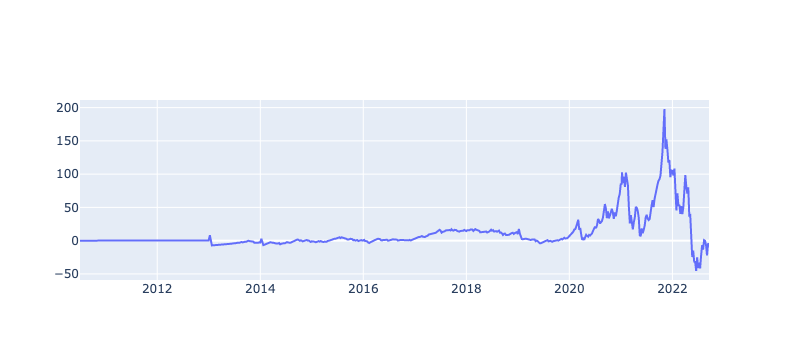

In [121]:
plot(pmcc, value='total running profit')

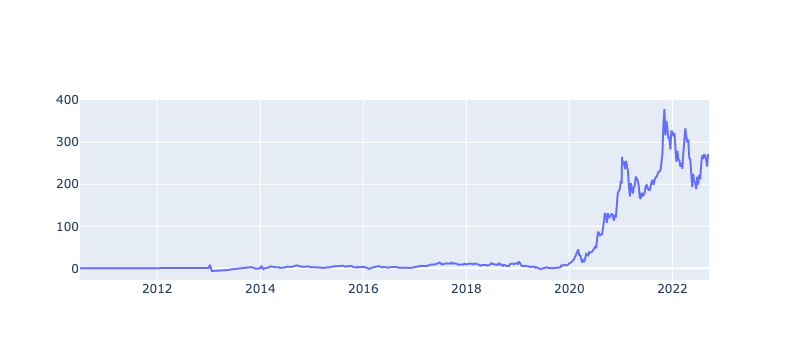

In [126]:
pmcc = PMCC(tsla_weekly, short_offset=25)
plot(pmcc, value='total running profit')

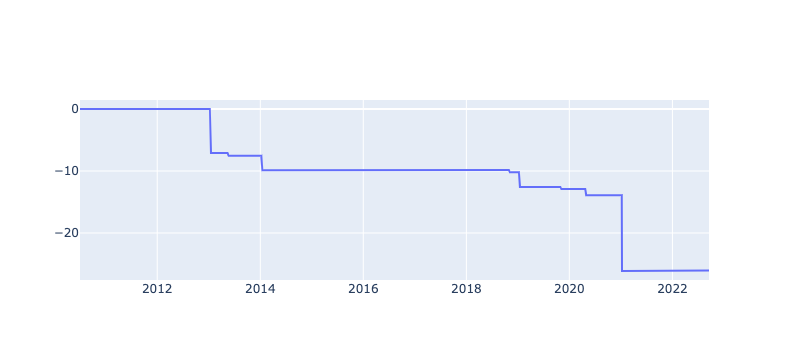

In [127]:
plot(pmcc, value='short calls running profit')

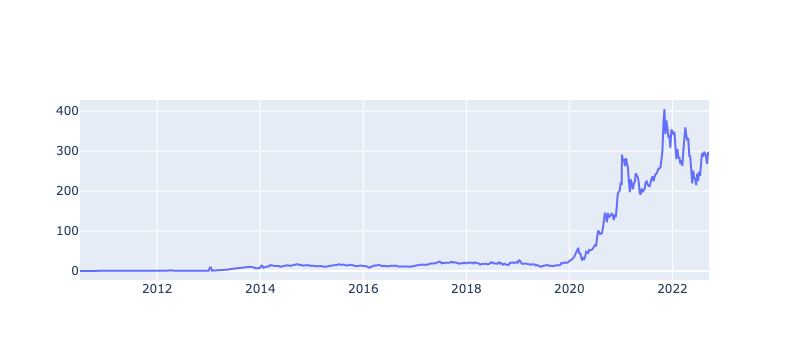

In [128]:
plot(pmcc, value='leap running profit')

In [133]:
1+(-50/100)

0.5

In [134]:
(1+-50/100.)

0.5

In [136]:
short_call

underlying open  underlying high  underlying low  underlying close  \
0           1.266667         1.730666        1.266667          1.280000   
1           1.333333         1.333333        1.076000          1.160000   
2           1.196667         1.380000        1.170000          1.380000   
3           1.423333         1.456667        1.366667          1.419333   
4           1.433333         1.433333        1.346667          1.329333   
..               ...              ...             ...               ...   
633       301.773303       311.666635      299.236637        296.666637   
634       292.136637       302.300000      291.519971        288.090000   
635       283.000000       288.000000      272.590000        270.210000   
636       272.630000       291.600000      272.630000        299.680000   
637       300.590000       300.590000      292.900000        292.130000   

         strike   call open  call close  weekly profit                date  \
0      0.633333    0.633593    0.646667      -0.013073 2010-07-02 09:30:00   
1      0.666667    0.666941    0.493333       0.173607 2010-07-09 09:30:00   
2      0.598333    0.598579    0.781667      -0.183087 2010-07-16 09:30:00   
3      0.711667    0.711959    0.707667       0.004292 2010-07-23 09:30:00   
4      0.716667    0.716961    0.612667       0.104294 2010-07-30 09:30:00   
..          ...         ...         ...            ...                 ...   
633  150.886652  150.948647  145.779985       5.168662 2022-08-20 09:30:00   
634  146.068319  146.128334  142.021681       4.106653 2022-08-27 09:30:00   
635  141.500000  141.558139  128.710000      12.848139 2022-09-03 09:30:00   
636  136.315000  136.371008  163.365000     -26.993992 2022-09-10 09:30:00   
637  150.295000  150.356752  141.835000       8.521752 2022-09-17 09:30:00   

     running profit  
0         -0.013073  
1          0.160534  
2         -0.022553  
3         -0.018261  
4          0.086034  
..              ...  
633     -199.107043  
634     -195.000389  
635     -182.152251  
636     -209.146242  
637     -200.624490  

[638 rows x 10 columns]

In [129]:
short_calls = []
for offset in range(-50, 55, 5):
    short_call = weekly_short_calls(tsla, offset)
    short_calls.append(short_call)

In [ ]:
[sc['running profit'] for sc in short_calls]

In [132]:
short_call.head()

underlying open  underlying high  underlying low  underlying close  strike  \
0         1.266667         1.730666        1.266667          1.280000   1.900   
1         1.333333         1.333333        1.076000          1.160000   2.000   
2         1.196667         1.380000        1.170000          1.380000   1.795   
3         1.423333         1.456667        1.366667          1.419333   2.135   
4         1.433333         1.433333        1.346667          1.329333   2.150   

      call open  call close  weekly profit                date  running profit  
0  4.645606e-13         0.0   4.645606e-13 2010-07-02 09:30:00    4.645606e-13  
1  4.890112e-13         0.0   4.890112e-13 2010-07-09 09:30:00    9.535718e-13  
2  4.388875e-13         0.0   4.388875e-13 2010-07-16 09:30:00    1.392459e-12  
3  5.220194e-13         0.0   5.220194e-13 2010-07-23 09:30:00    1.914479e-12  
4  5.256870e-13         0.0   5.256870e-13 2010-07-30 09:30:00    2.440166e-12

In [148]:
len(short_calls)

21

In [150]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=short_calls[0]['date'], y=short_calls[0]['running profit'])])
offset = np.arange(-50, 55, 5)
for i in range(1, len(short_calls)):
    print(offset[i])
    fig.add_scatter(x=short_calls[i]['date'], y=short_calls[i]['running profit'], name=str(offset[i]))

-45
-40
-35
-30
-25
-20
-15
-10
-5
0
5
10
15
20
25
30
35
40
45
50


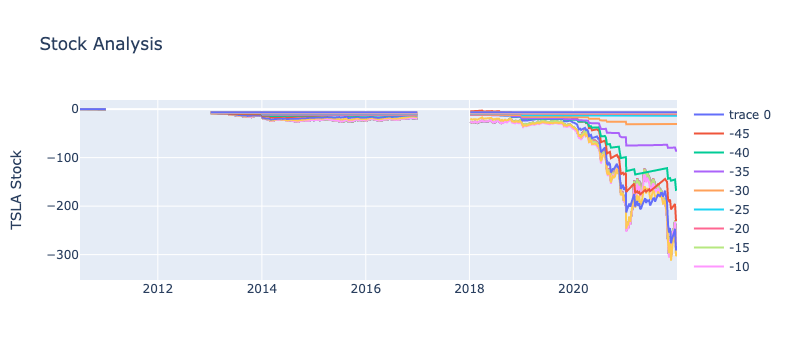

In [ ]:
from plots import update_fig
update_fig(fig)

In [147]:
np.arange(-50, 55, 5)

array([-50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,
        15,  20,  25,  30,  35,  40,  45,  50])

In [ ]:
import plotly.graph_objects as go
from plots import update_fig

In [ ]:
    offsets = np.arange(-50,55,5)

-45
-40
-35
-30
-25
-20
-15
-10
-5
0
5
10
15
20
25
30
35
40
45
50


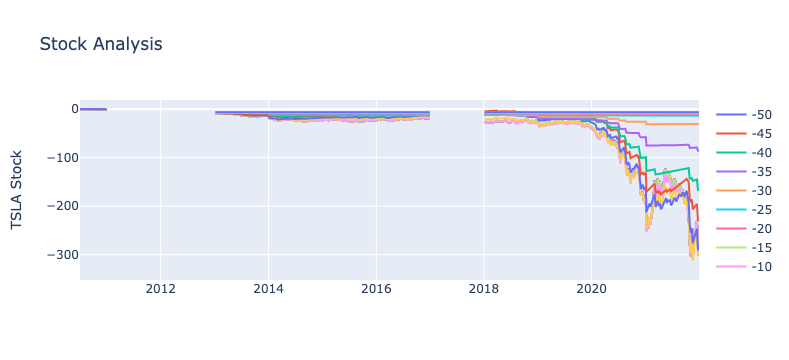

In [157]:
short_calls = []
offsets = np.arange(-50,55,5)
for offset in offsets:
    short_call = weekly_short_calls(tsla, offset)
    short_calls.append(short_call)

final_profit = []
fig = go.Figure(data=[go.Scatter(x=short_calls[0]['date'], 
                                 y=short_calls[0]['running profit'], 
                                 name=str(offsets[0]))])

for i in range(1, len(short_calls)):
    print(offsets[i])
    fig.add_scatter(x=short_calls[i]['date'], 
                    y=short_calls[i]['running profit'], 
                    name=str(offsets[i]))
update_fig(fig)

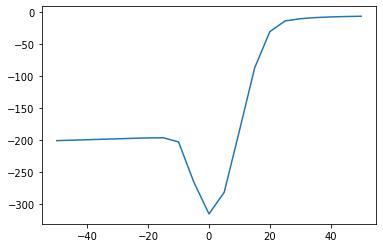

In [158]:
plt.plot(offsets, [sc['running profit'].iloc[-1] for sc in short_calls])

In [164]:
# LEAPS(df_minutely, percent_offset=-5)
LEAPS_list = []
offsets = np.arange(-50,55,5)
for offset in offsets:
    leaps = LEAPS(tsla, offset)
    LEAPS_list.append(leaps)

final_profit = []
fig = go.Figure(data=[go.Scatter(x=LEAPS_list[0]['date'], 
                                 y=LEAPS_list[0]['running profit'], 
                                 name=str(LEAPSs[0]))])

for i in range(1, len(LEAPSs)):
    print(offsets[i])
    fig.add_scatter(x=LEAPS_list[i]['date'], 
                    y=LEAPS_list[i]['running profit'], 
                    name=str(LEAPS_list[i]))
update_fig(fig)

NameError: name 'LEALEAPS_listPSs' is not defined

-45
-40
-35
-30
-25
-20
-15
-10
-5
0
5
10
15
20
25
30
35
40
45
50


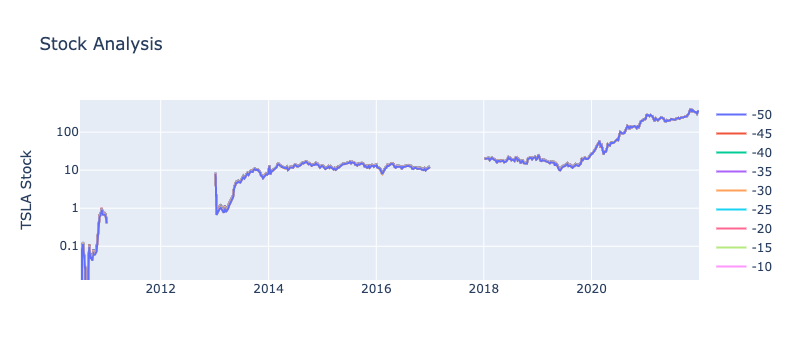

In [172]:

final_profit = []
fig = go.Figure(data=[go.Scatter(x=LEAPS_list[0]['date'], 
                                 y=LEAPS_list[0]['running profit'], 
                                 name=str(offsets[0]))])

for i in range(1, len(LEAPS_list)):
    print(offsets[i])
    fig.add_scatter(x=LEAPS_list[i]['date'], 
                    y=LEAPS_list[i]['running profit'], 
                    name=str(offsets[i]))
update_fig(fig, log_y=True)

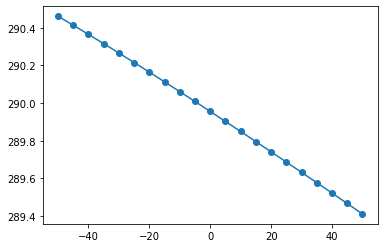

In [170]:
plt.plot(offsets, [l['running profit'].iloc[-1] for l in LEAPS_list], marker ='o')

In [173]:
from monte_carlo import iterate_strategy
offset_results = iterate_strategy(weekly_short_calls, tsla, offsets = np.arange(-50,55,5))

In [174]:
from plots import plots

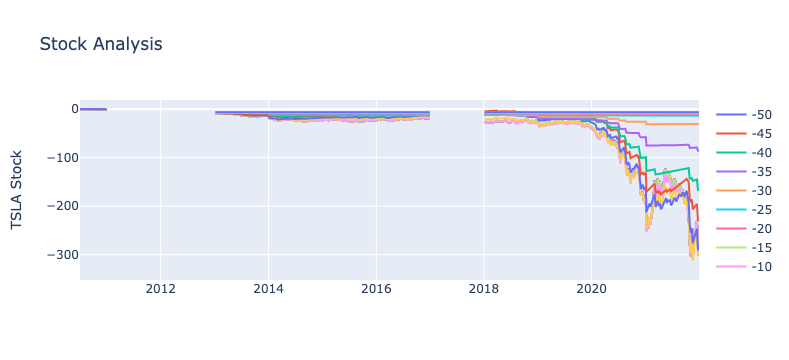

In [175]:
plots(offset_results,  offsets = np.arange(-50,55,5))